Stacked LSTMs are now a stable technique for challenging sequence prediction problems. A Stacked LSTM architecture can be defined as an LSTM model comprised of multiple LSTM layers. An LSTM layer above provides a sequence output rather than a single value output to the LSTM layer below. Specifically, one output per input time step, rather than one output time step for all input time steps.

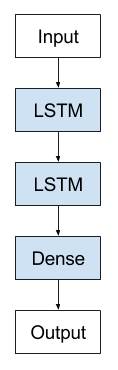

Each LSTMs memory cell requires a 3D input. When an LSTM processes one input sequence of time steps, each memory cell will output a single value for the whole sequence as a 2D array.

In [1]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
# define model where LSTM is also output layer
model = Sequential()
model.add(LSTM(1, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))


The input sequence has 3 values. Running the example outputs a single value for the input sequence as a 2D array.

In [2]:
# make and show prediction
print(model.predict(data))

[[-0.08922725]]


To stack LSTM layers, we need to change the configuration of the prior LSTM layer to output a 3D array as input for the subsequent layer.

We can do this by setting the return_sequences argument on the layer to True (defaults to False). This will return one output for each input time step and provide a 3D array.
Below is the same example as above with return_sequences=True.

In [3]:
# Example of one output for each input time step
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
# define model where LSTM is also output layer
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[[-0.00740851]
  [-0.02024644]
  [-0.037393  ]]]


We can continue to add hidden LSTM layers as long as the prior LSTM layer provides a 3D output as input for the subsequent layer; for example, below is a Stacked LSTM with 4 hidden layers.

model = Sequential()

model.add(LSTM(..., return_sequences=True, input_shape=(...)))

model.add(LSTM(..., return_sequences=True))

model.add(LSTM(..., return_sequences=True))

model.add(LSTM(...))

model.add(Dense(...))